In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
#filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/ttHbb/store/mc/RunIISummer20UL18NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/2500000/6BF93845-49D5-2547-B860-4F7601074715.root"
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/ttHbb/store/mc/RunIISummer20UL18NanoAODv9/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/130000/44187D37-0301-3942-A6F7-C723E9F4813D.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()
#events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=1000).events()

In [3]:
list(filter(lambda x: 'mva' in x, events.Electron.fields))

['mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'mvaTTH',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL']

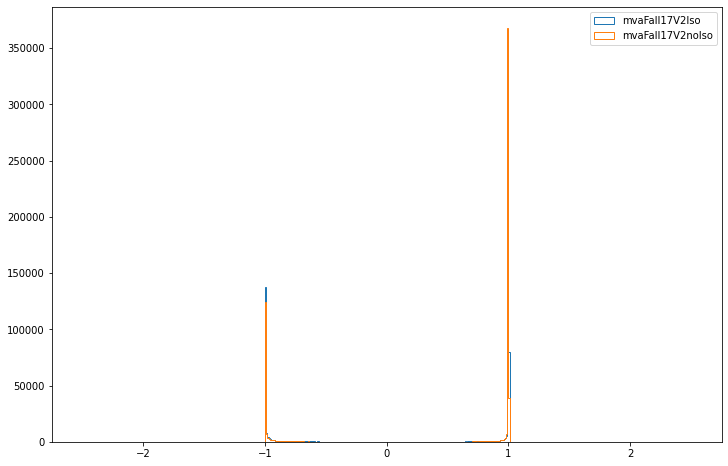

In [30]:
electrons = events.Electron[(events.Electron.pt>10) & (abs(events.Electron.eta)<0.8)]
plt.figure(figsize=[12,8])
plt.hist(ak.flatten(electrons.mvaFall17V2Iso), bins=np.linspace(-2.5,2.5,501), histtype='step', label="mvaFall17V2Iso");
plt.hist(ak.flatten(electrons.mvaFall17V2noIso), bins=np.linspace(-2.5,2.5,501), histtype='step', label="mvaFall17V2noIso");
#plt.hist(ak.flatten(electrons.mvaTTH), bins=np.linspace(-1,1,21), histtype='step', label="mvaTTH");
plt.legend();

In [5]:
wpl = np.array(ak.flatten(electrons.mvaFall17V2Iso_WPL).tolist(), dtype=int)
wp80 = np.array(ak.flatten(electrons.mvaFall17V2Iso_WP80).tolist(), dtype=int)
wp90 = np.array(ak.flatten(electrons.mvaFall17V2Iso_WP90).tolist(), dtype=int)

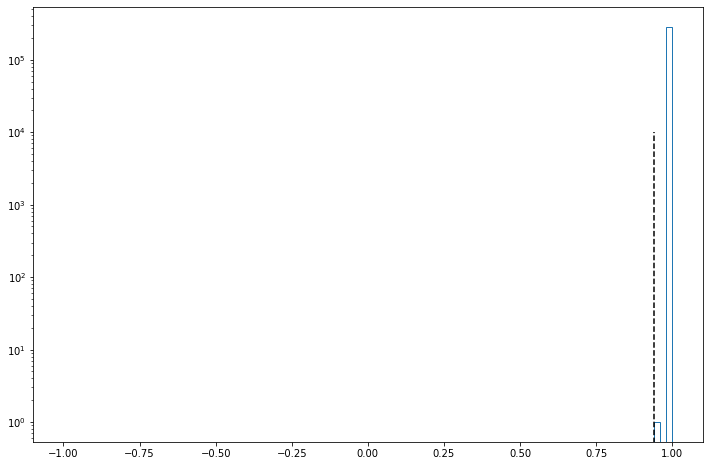

In [26]:
plt.figure(figsize=[12,8])
score = np.array(ak.flatten(electrons.mvaFall17V2Iso).tolist())
pt = np.array(ak.flatten(electrons.pt).tolist())
plt.hist(score[wp80>0.5], bins=100, range=(-1,1), histtype='step')
plt.vlines(0.941, 0, 10**4, color='black', linestyle='dashed')
plt.yscale("log")

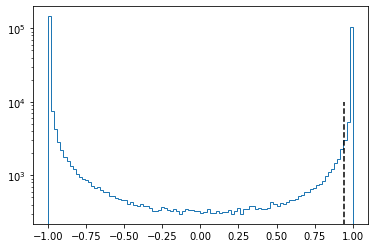

In [27]:
plt.hist(score[wp80<0.5], bins=100, range=(-1,1), histtype='step')
plt.vlines(0.941, 0, 10**4, color='black', linestyle='dashed')
plt.yscale("log");

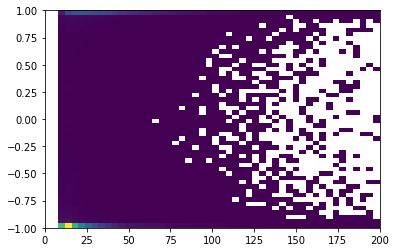

In [8]:
plt.hist2d(pt[wp80<0.5], score[wp80<0.5], bins=50, range=[[0,200], [-1,1]], cmin=1);

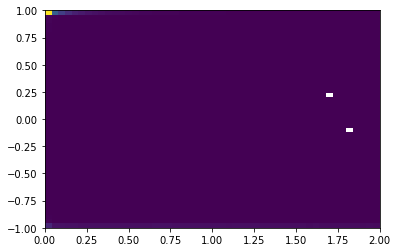

In [34]:
pfRelIso03_all = np.array(ak.flatten(electrons.pfRelIso03_all).tolist())
dxy = np.array(ak.flatten(electrons.dxy).tolist())
plt.hist2d(pfRelIso03_all[wp80<0.5], score[wp80<0.5], bins=50, range=[[0,2], [-1,1]], cmin=1);

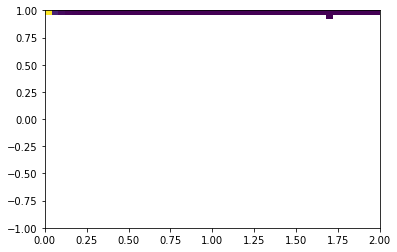

In [35]:
pfRelIso03_all = np.array(ak.flatten(electrons.pfRelIso03_all).tolist())
plt.hist2d(pfRelIso03_all[wp80>0.5], score[wp80>0.5], bins=50, range=[[0,2], [-1,1]], cmin=1);

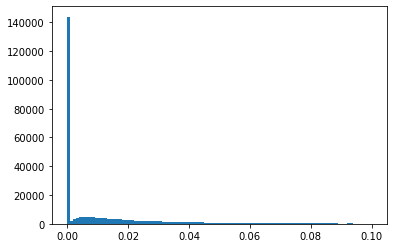

In [41]:
plt.hist(pfRelIso03_all[wp80>0.5], bins=100, range=(0,0.1));

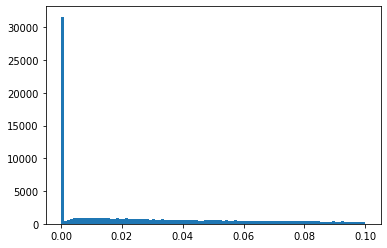

In [42]:
plt.hist(pfRelIso03_all[wp80<0.5], bins=100, range=(0,0.1));

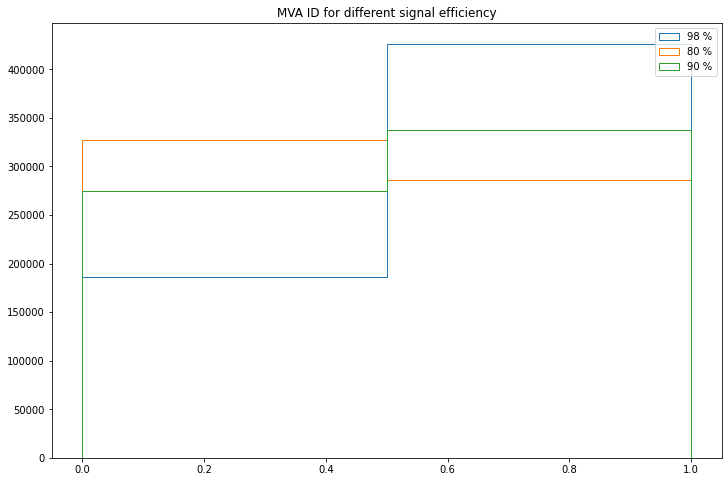

In [11]:
plt.figure(figsize=[12,8])
plt.title("MVA ID for different signal efficiency")
plt.hist(wpl, bins=(0,0.5,1), histtype='step', label='98 %')
plt.hist(wp80, bins=(0,0.5,1), histtype='step', label='80 %')
plt.hist(wp90, bins=(0,0.5,1), histtype='step', label='90 %')
plt.legend();

In [12]:
list(filter(lambda x: 'mva' in x, events.Muon.fields))

['mvaLowPt', 'mvaTTH', 'mvaId', 'mvaLowPtId']

In [13]:
list(filter(lambda x: 'deltaEta' in x, events.Electron.fields))

['deltaEtaSC']

In [51]:
list(filter(lambda x: 'Id' in x, events.Muon.fields))

['jetIdx',
 'pdgId',
 'fsrPhotonIdx',
 'highPtId',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'genPartIdx',
 'fsrPhotonIdxG',
 'genPartIdxG',
 'jetIdxG']

In [77]:
leptons = ak.with_name(ak.concatenate( (events.Electron, events.Muon), axis=1), name='PtEtaPhiMCandidate')
leptons = leptons[ak.argsort(leptons.pt, ascending=False)]
leptons.pt

<Array [[176, 47.7, 29.7, 11, ... [52.6]] type='1359000 * var * float32'>

In [75]:
ak.firsts(leptons)

<Array [[0.0254, 3.14, 2.39, ... 3.63, 1.22]] type='1359000 * option[var * float32]'>